## 10 Year CHD (Coronary Heart Disease) Prediction 
Coronary artery disease (CAD), also called coronary heart disease (CHD), or ischemic heart disease (IHD), is a type of heart disease involving the reduction of blood flow to the cardiac muscle due to a build-up of atheromatous plaque in the arteries of the heart. It is the most common of the cardiovascular diseases. CAD can cause stable angina, unstable angina, myocardial ischemia, and myocardial infarction.

A common symptom is angina, which is chest pain or discomfort that may travel into the shoulder, arm, back, neck, or jaw. Occasionally it may feel like heartburn. In stable angina, symptoms occur with exercise or emotional stress, last less than a few minutes, and improve with rest. Shortness of breath may also occur and sometimes no symptoms are present. In many cases, the first sign is a heart attack. Other complications include heart failure or an abnormal heartbeat.

### Dataset
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### Process
  1) Importing libraries 
  2) Load the Dataset
  3) Exploratory Data Analysis(EDA)
  4) Train Test Splitting
  5) Model Training and metrics

### Objective
This project aims to apply EDA to the chosen dataset and infer the causes or reasons behind cardiovascular diseases with the help of classification technique called Logistic Regression


### 1) Importing Libraries

In [165]:
# 1. to handle the data
import numpy as np
import pandas as pd

# 2. To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# 4. To train the machine 
from sklearn.model_selection import train_test_split

# 5. For classification task
from sklearn.linear_model import LogisticRegression

# 6. For metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
 

### 2) Load the Dataset

In [166]:
data = pd.read_csv('./framingham.csv')
data.sort_values(by='TenYearCHD', ascending = False)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3875,0,56,1.0,1,40.0,0.0,0,1,0,214.0,147.0,65.0,17.68,110.0,87.0,1
2938,0,65,1.0,0,0.0,0.0,0,1,0,225.0,145.0,91.0,29.80,80.0,83.0,1
1923,1,37,2.0,1,20.0,0.0,0,0,0,211.0,116.5,77.5,24.50,68.0,78.0,1
1922,0,66,2.0,0,0.0,0.0,0,1,0,292.0,143.0,95.0,31.11,90.0,77.0,1
2609,0,58,3.0,0,0.0,0.0,0,1,0,241.0,143.5,85.5,23.96,96.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1,53,2.0,1,20.0,0.0,0,0,0,211.0,112.5,70.0,22.74,63.0,NaN,0
1541,1,46,3.0,1,10.0,0.0,0,0,0,214.0,118.0,82.0,29.41,66.0,94.0,0
1542,0,63,2.0,0,0.0,0.0,0,1,0,293.0,186.5,97.0,30.47,60.0,96.0,0
1543,1,52,3.0,0,0.0,0.0,0,1,0,238.0,131.0,99.0,31.19,96.0,86.0,0


### 3) Exploratory Data Analysis (EDA)
Exploring each column

In [167]:
print(data.shape)
data.info()

(4240, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [168]:
data.insert(0, 'sex', data.pop('male'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [169]:
data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [170]:
data.isnull().sum().sort_values(ascending = False)




glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
sex                  0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [171]:
mean = data['glucose'].mean(skipna=True)
data['glucose'].fillna(mean, inplace= True)
mean = data['education'].mean(skipna=True)
data['education'].fillna(mean, inplace=True)
data['BPMeds'].fillna(data['BPMeds'].mode()[0], inplace=True)
data['totChol'].fillna(data['totChol'].mean(skipna=True), inplace=True)
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(skipna=True), inplace=True)
data['BMI'].fillna(data['BMI'].mean(skipna=True), inplace=True)
data['heartRate'].fillna(data['heartRate'].mean(skipna=True),inplace=True)

In [172]:
data.isnull().sum().sort_values(ascending = False)


sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

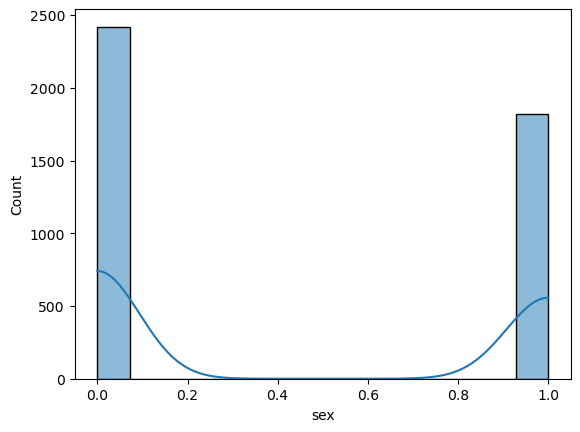

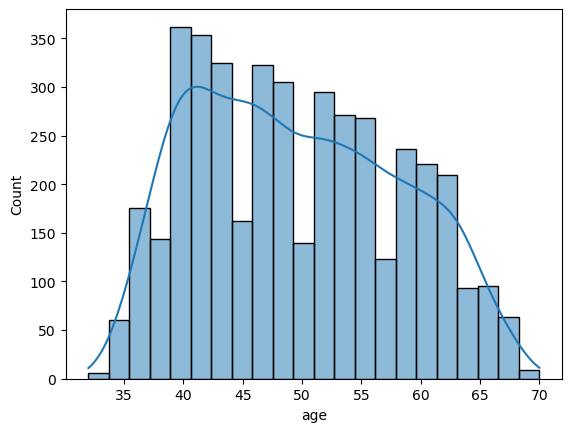

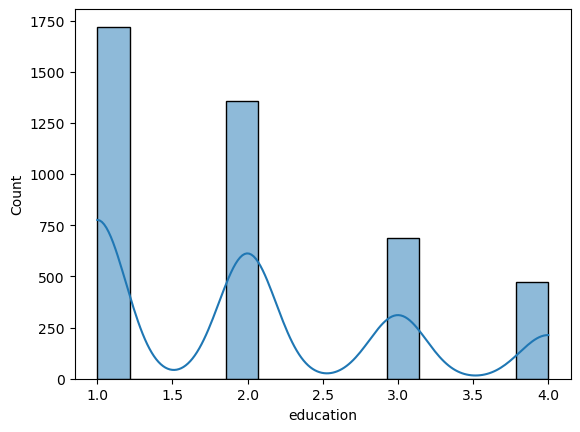

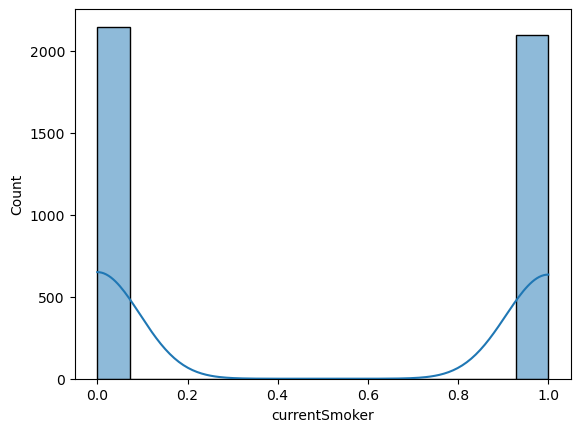

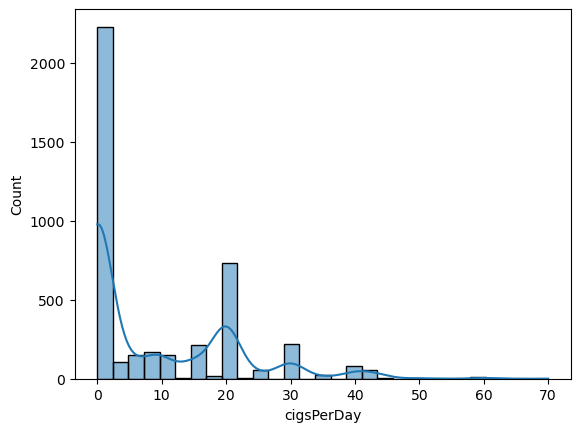

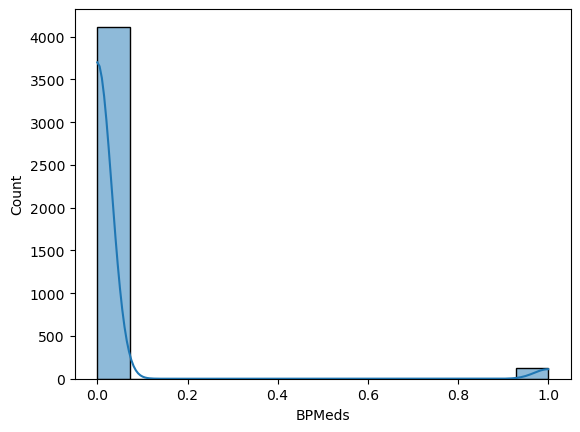

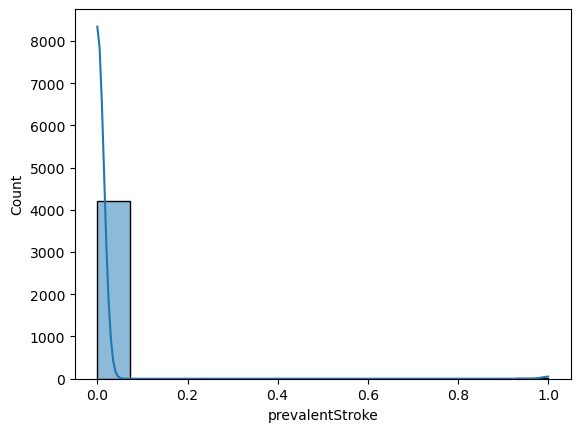

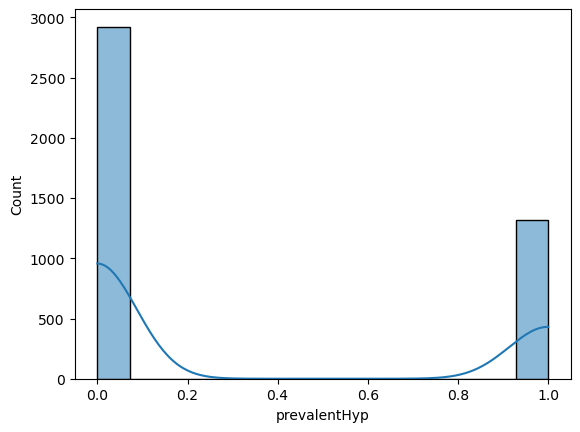

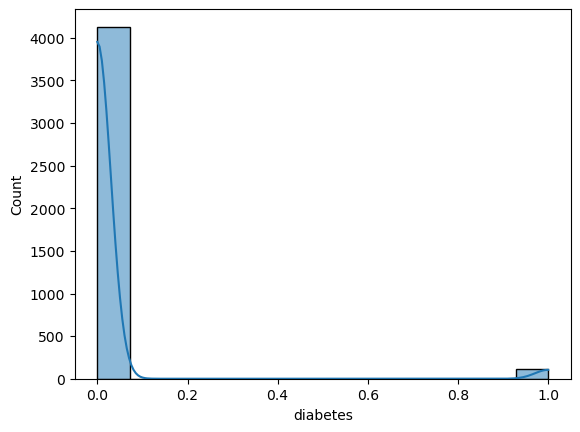

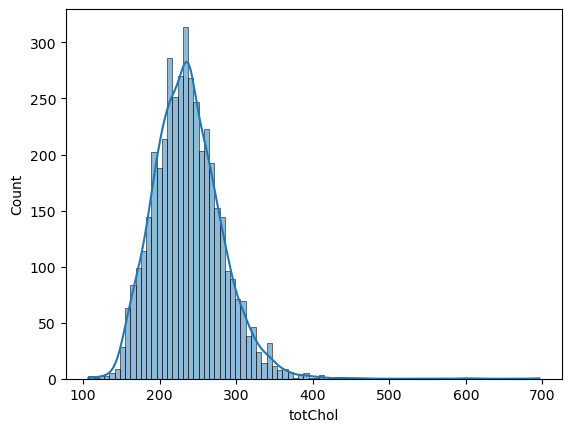

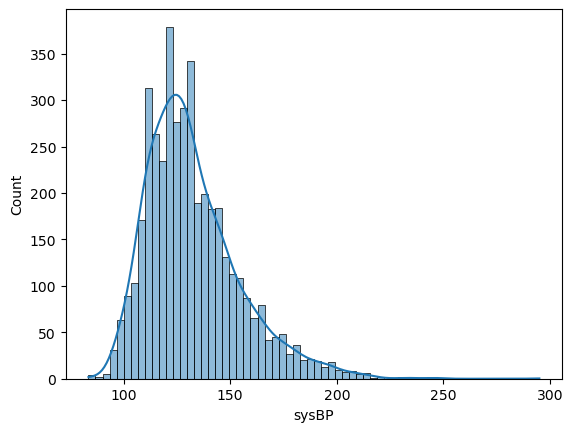

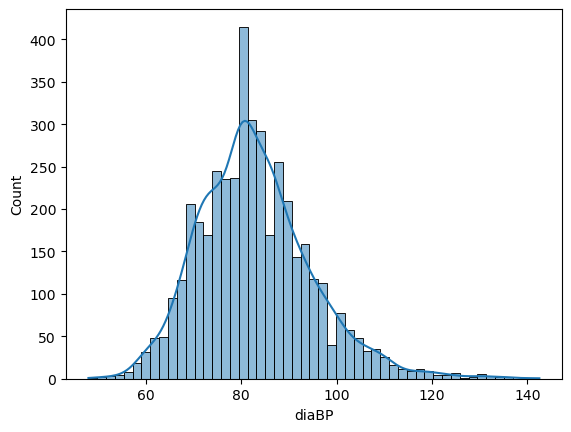

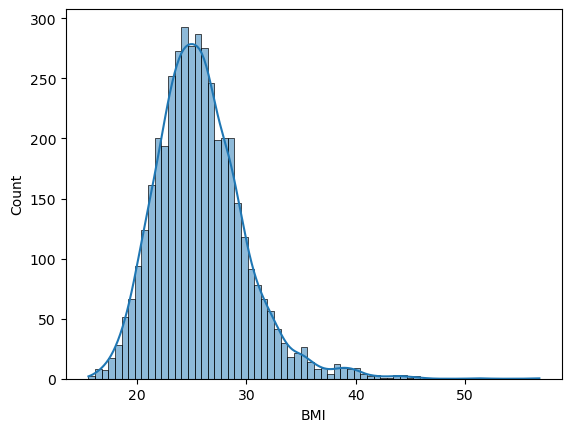

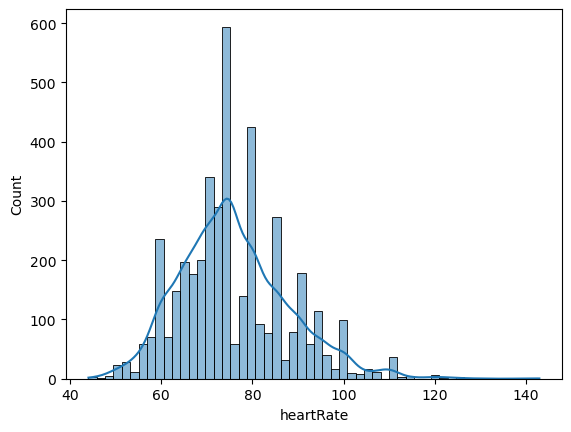

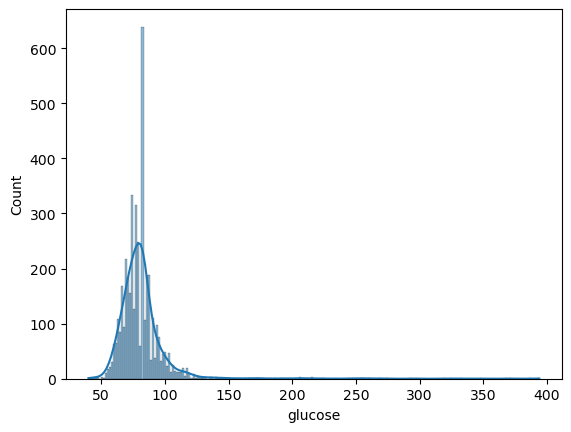

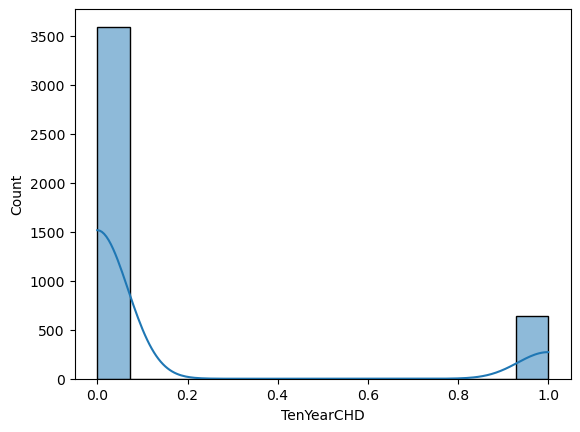

In [173]:
for i in data.columns:
    sns.histplot(data[i], kde = True)
    plt.show()


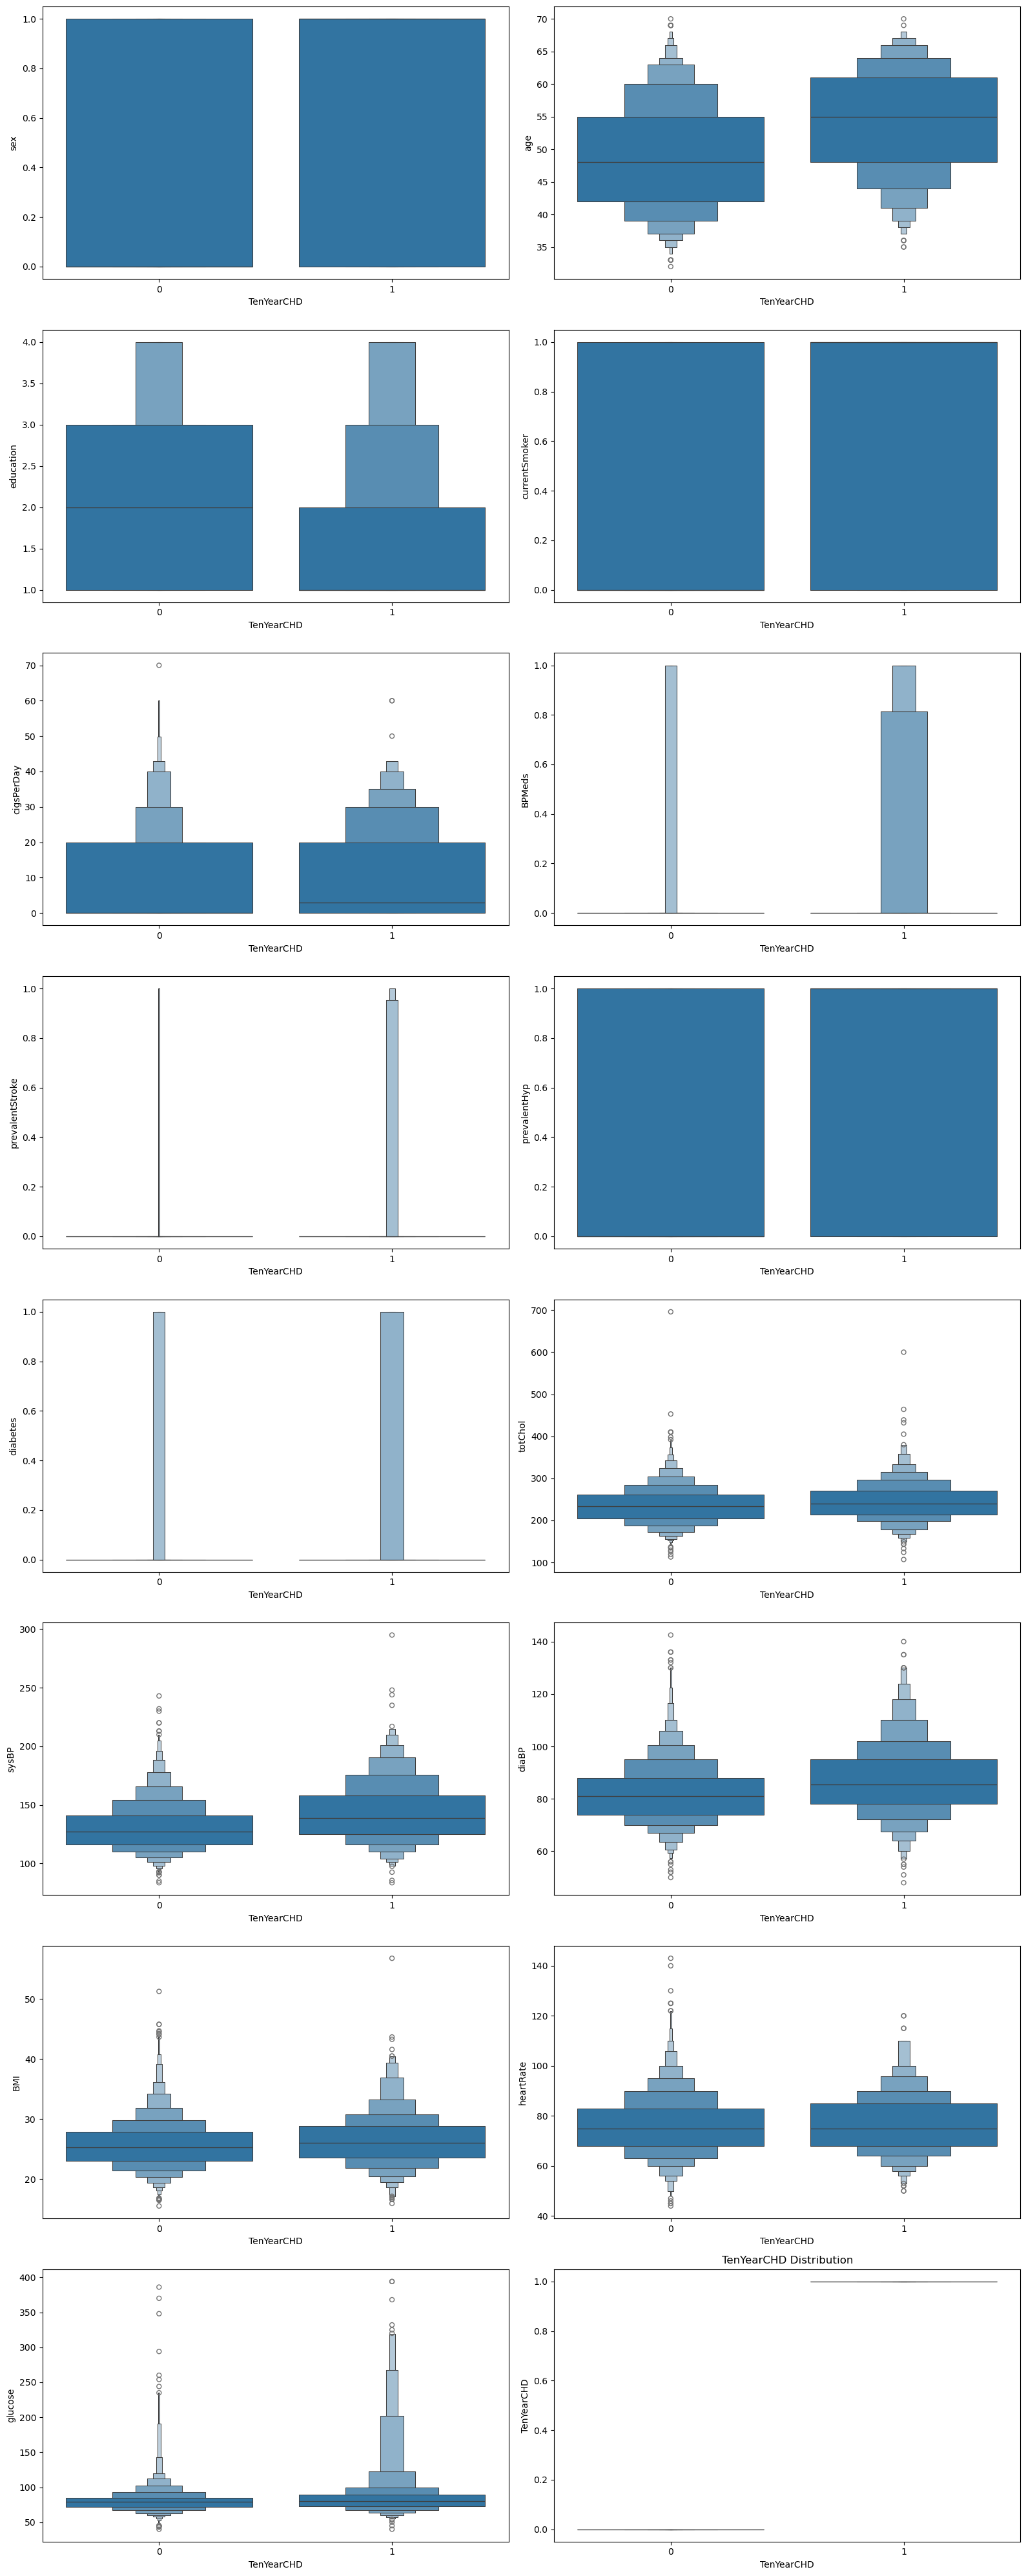

In [174]:
fig, axes = plt.subplots(nrows=(len(data.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(data):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=data, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout();
   

For predicting 10 year CHD or similar cases of diseases, outliers may represent real life high-risk cases and are important data points.
So instead of removing the outliers, in the case of Logistic Regression we will be evaluating the model with the outliers and after scaling to see if the outliers affect the model in a negative way or not.

<AxesSubplot: >

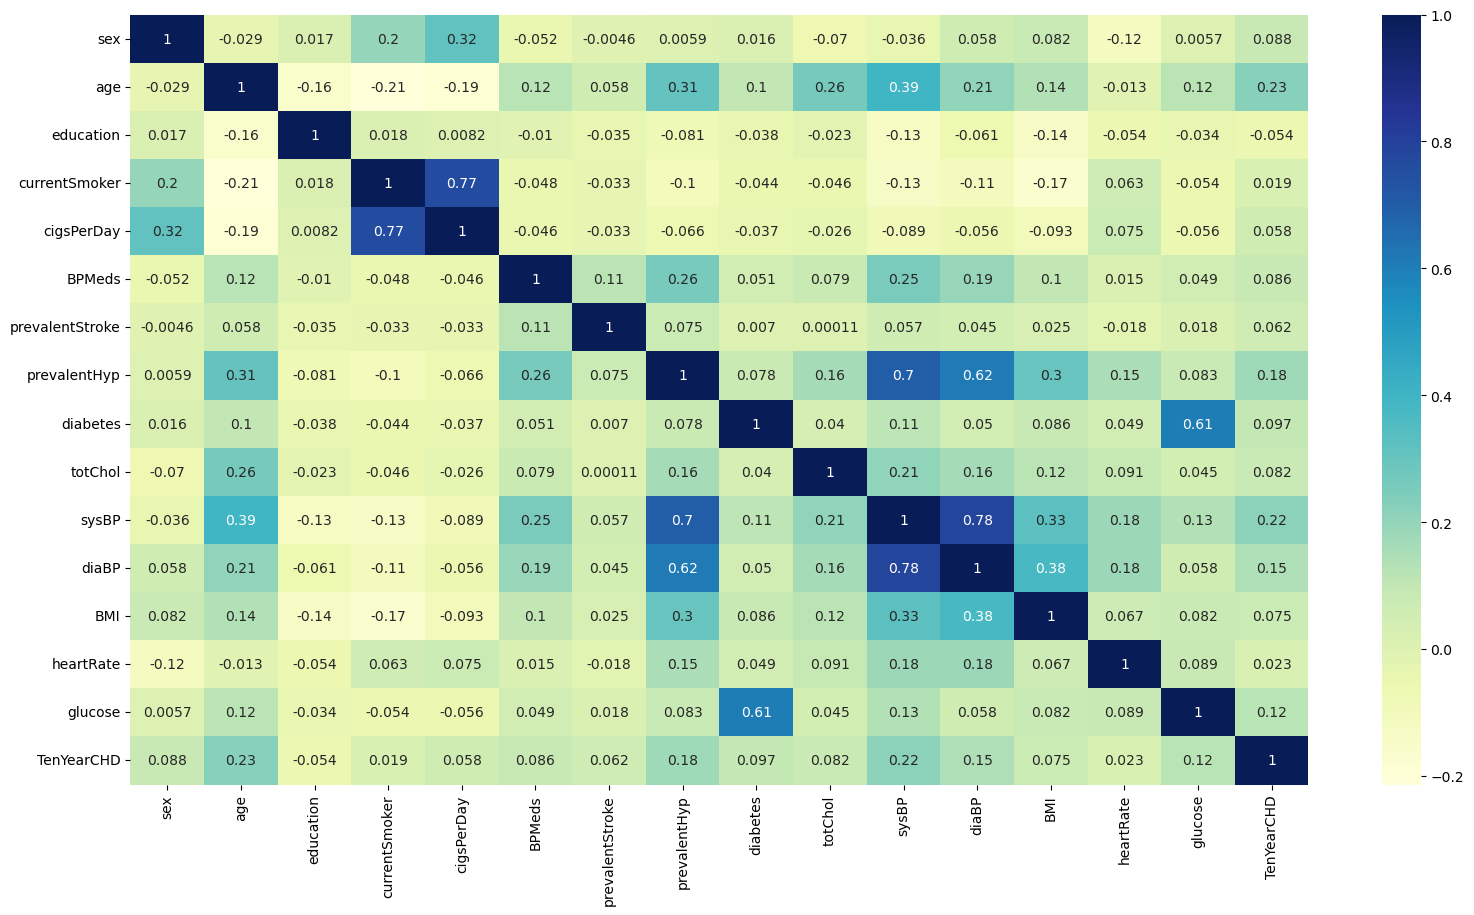

In [175]:
plt.figure(figsize = (19,10))
sns.heatmap(data.corr(), cmap="YlGnBu",
            annot=True)

The above heatmap shows that features like sysBP, age, diaBP have higher correlation with the target variable whereas features like cigsPerDay, heartRate, totChol etc. have lower correlation with the target variable. So only the features with lower correlation with the TenYearCHD will be scaled in order to preserve the significance of correlated data with the target variable.


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [177]:
X = data.drop(columns=['TenYearCHD'])
target = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state= 42)

In [178]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
print("precision: ", precision)
print("accuracy: ", accuracy_score(y_test, y_pred) )
# Ensure 'a' has the same columns as your training data (X_train)
a = pd.DataFrame({
    'sex': [0],
    'age': [61],    
    'education': [3.0],
    'currentSmoker': [1],
    'cigsPerDay': [30.0],
    'BPMeds': [0.0],
    'prevalentStroke': [0],
    'prevalentHyp': [1],
    'diabetes': [0],
    'totChol': [225.0],
    'sysBP': [150.0],
    'diaBP': [95.0],
    'BMI': [28.58],
    'heartRate': [65.0],
    'glucose': [103.0]
})

# Ensure the columns are in the same order as your training data
a = a[X_train.columns]

# Now predict
b = model.predict(a)
print("Prediction: ", b)
X_train.columns

precision:  0.7142857142857143
accuracy:  0.8584905660377359
Prediction:  [1]


Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [180]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc


0.6256237734791141

[       inf 0.84784822 0.53094529 0.49270623 0.44244299 0.43562758
 0.41960824 0.41211266 0.40916446 0.38662328 0.38575528 0.34749773
 0.34730312 0.3294456  0.32850437 0.32258981 0.32255185 0.31597435
 0.31483834 0.30697295 0.30579532 0.30576163 0.30435245 0.29881938
 0.2983828  0.29758932 0.29728804 0.29032154 0.28802131 0.28798998
 0.2854595  0.28528919 0.28499377 0.27404529 0.27343497 0.26984341
 0.26868946 0.25789911 0.25664374 0.25361039 0.25308367 0.25245529
 0.25158753 0.25087082 0.25084969 0.24915353 0.24839035 0.24154969
 0.23970173 0.23092285 0.22967833 0.22810453 0.22792228 0.22766987
 0.22753458 0.2256459  0.22555501 0.22082313 0.22031266 0.21844
 0.21820642 0.21629518 0.21595515 0.21282663 0.21253417 0.21168669
 0.21112805 0.20428419 0.20420404 0.1975636  0.1973714  0.19624144
 0.19604857 0.19361053 0.19359357 0.19335095 0.19301568 0.19284539
 0.19271189 0.19220704 0.1921039  0.18420005 0.18305188 0.18115576
 0.18107835 0.17735904 0.17721101 0.17624076 0.17617036 0.1760529

Text(0, 0.5, 'TPR')

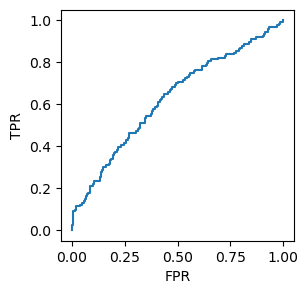

In [181]:
import matplotlib.pyplot as plt

fpr, tpr, thresolds = roc_curve(y_test, y_pred_proba)
print(thresolds)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [182]:
s = StandardScaler()
col = ['cigsPerDay', 'totChol', 'BMI', 'heartRate']
scalable = data[col]
a = s.fit_transform(scalable)
print(a)
scalable = pd.DataFrame(a, columns=col)
print(scalable)
data[col] = scalable
data.head()

[[-0.75806219 -0.94082501  0.28725796  0.34277523]
 [-0.75806219  0.30008549  0.71966845  1.59043467]
 [ 0.92540996  0.18727545 -0.11321311 -0.07311125]
 ...
 [-0.75806219  0.72876367 -1.06402482  0.34277523]
 [-0.75806219 -1.1664451  -0.04933429 -0.73852962]
 [ 1.76714603 -0.918263   -1.20160997  0.75866171]]
      cigsPerDay   totChol       BMI  heartRate
0      -0.758062 -0.940825  0.287258   0.342775
1      -0.758062  0.300085  0.719668   1.590435
2       0.925410  0.187275 -0.113213  -0.073111
3       1.767146 -0.263965  0.682815  -0.904884
4       1.177931  1.089756 -0.663554   0.758662
...          ...       ...       ...        ...
4235    0.925410  0.254961 -0.933810   0.675484
4236    0.504542 -0.602395 -1.631564   0.841839
4237   -0.758062  0.728764 -1.064025   0.342775
4238   -0.758062 -1.166445 -0.049334  -0.738530
4239    1.767146 -0.918263 -1.201610   0.758662

[4240 rows x 4 columns]


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,-0.758062,0.0,0,0,0,-0.940825,106.0,70.0,0.287258,0.342775,77.0,0
1,0,46,2.0,0,-0.758062,0.0,0,0,0,0.300085,121.0,81.0,0.719668,1.590435,76.0,0
2,1,48,1.0,1,0.925410,0.0,0,0,0,0.187275,127.5,80.0,-0.113213,-0.073111,70.0,0
3,0,61,3.0,1,1.767146,0.0,0,1,0,-0.263965,150.0,95.0,0.682815,-0.904884,103.0,1
4,0,46,3.0,1,1.177931,0.0,0,0,0,1.089756,130.0,84.0,-0.663554,0.758662,85.0,0


It was observed that scaling only a few features while preserving the comparatively correlated features increased precision by 8 to 10 percentage and increased the roc score as compared to completely unscaled data.

In [183]:
X = data.drop(columns=['TenYearCHD'])
target = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state= 42)
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
print("precision: ", precision)
print("accuracy: ", accuracy_score(y_test, y_pred) )
print("f1_score: ", f1_score(y_test, y_pred))

precision:  0.7142857142857143
accuracy:  0.8584905660377359
f1_score:  0.07692307692307693


In [185]:
arr = confusion_matrix(y_test, y_pred)
print(arr)

#true negatives {0,0}`,
#false negatives {1,0}`,
#true positives {1,1}`
#false positives {0,1}`
tp = arr[1][1]
tn = arr[0][0]
fp = arr[0][1]
fn = arr[1][0]

accuracy = (tp+tn)/(tp+fp+tn+fn)
print(accuracy)
precision = tp/(tp+fp)
print(precision)
recall = tp/(tp+fn)
print(recall)
f1_score = 2 * precision * recall / (precision + recall)
f1_score


[[723   2]
 [118   5]]
0.8584905660377359
0.7142857142857143
0.04065040650406504


0.07692307692307693

In [186]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc


0.6892402579198205

[       inf 0.60343644 0.55593599 0.53051004 0.47901865 0.45949837
 0.45253735 0.42476769 0.41586975 0.40981987 0.40665789 0.38086051
 0.37749651 0.3709894  0.36940049 0.36187896 0.35556323 0.34312942
 0.33141596 0.32488366 0.32316855 0.30824366 0.30781186 0.30288827
 0.29980257 0.29209988 0.29013585 0.2894193  0.28627077 0.28617012
 0.28406765 0.28341172 0.28305368 0.28132968 0.28093336 0.27652975
 0.27615715 0.27544296 0.27511787 0.27405475 0.27253379 0.26865389
 0.26773519 0.26164392 0.25972722 0.2590591  0.25879769 0.25789904
 0.256192   0.25592016 0.25564328 0.25535959 0.25479343 0.25186463
 0.25133326 0.25042303 0.24937292 0.24394981 0.24373552 0.24084177
 0.2405439  0.23728697 0.23179823 0.22980465 0.2297517  0.22456313
 0.22389406 0.22191246 0.21978176 0.21367669 0.21363962 0.21019807
 0.20952816 0.20802234 0.20793294 0.20762636 0.20690242 0.20307614
 0.202749   0.202571   0.20231217 0.19587554 0.19475507 0.19417734
 0.19345088 0.18972409 0.18908703 0.18483496 0.18468708 0.1819

Text(0, 0.5, 'TPR')

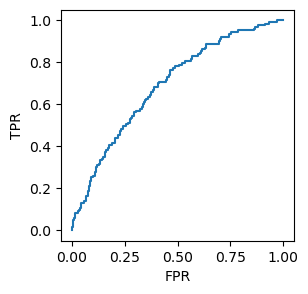

In [187]:
import matplotlib.pyplot as plt

fpr, tpr, thresolds = roc_curve(y_test, y_pred_proba)
print(thresolds)

plt.figure(figsize=(3,3))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')